In [3]:
%matplotlib inline
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd
import Nucleaseq_data_processing as processing
reload(processing);

path = '../data_nucleaseq_Finkelsteinlab/targetE/'
filename = 'ECas9_cleavage_rate_and_y0_Canonical_OT-r_0-2.csv'

In [73]:
position = '14'

data = pd.read_csv(path+filename)
target = 'TTTA - GACGCA  T  AAAGATGAGACGC - TGG'
print target
print '0123 - 456789 10 11.. etc'
data.columns = [c.replace(' ', '_') for c in data.columns]
mismatch = data[data.Mutation_Positions == position]

sequences = np.array(mismatch.Sequence)
rates = np.array(mismatch.cleavage_rate)
mismatch.head()

TTTA - GACGCA  T  AAAGATGAGACGC - TGG
0123 - 456789 10 11.. etc


,Sequence,cleavage_rate,cleavage_rate_5th_pctl,cleavage_rate_95th_pctl,On_Target,PAM,Canonical,Length_difference,Alignment,Alignment_(All),Mutation_ID,Mutation_Type,Mutation_Count,Mutation_Positions
0,GTTAGACGCAAAAAGATGAGACGCTGG,0.006562,0.005024,0.008606,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n|||||||||||||.||||||\r...,CGCAGAGTAGAAATA-CGCAG\r\n||||||||||||| | |||||...,r:14:A,r,1.0,14
42,TTTAGACGCAAAAAGATGAGACGCTGG,0.006392,0.002787,0.007199,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n|||||||||||||.||||||\r...,CGCAGAGTAGAAATA-CGCAG\r\n||||||||||||| | |||||...,r:14:A,r,1.0,14
63,TTTTGACGCAAAAAGATGAGACGCTGG,0.005836,0.004038,0.008633,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n|||||||||||||.||||||\r...,CGCAGAGTAGAAATA-CGCAG\r\n||||||||||||| | |||||...,r:14:A,r,1.0,14
172,TTCAGACGCAGAAAGATGAGACGCTGG,0.000343,0.000207,0.000388,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n|||||||||||||.||||||\r...,CGCAGAGTAGAAAT-ACGCAG\r\n||||||||||||| ||||||...,r:14:G,r,1.0,14
182,TTTAGACGCAGAAAGATGAGACGCTGG,0.000126,0.000086,0.000204,False,TGG,True,0,CGCAGAGTAGAAATACGCAG\r\n|||||||||||||.||||||\r...,CGCAGAGTAGAAAT-ACGCAG\r\n||||||||||||| ||||||...,r:14:G,r,1.0,14


In [74]:
A = list()
G = list()
C = list()
T = list()

for i in range(len(rates)):
    if sequences[i][10] == 'T':
        T.append(rates[i])
    elif sequences[i][10] == 'A':
        A.append(rates[i])
    elif sequences[i][10] == 'G':
        G.append(rates[i])
    elif sequences[i][10] == 'C':
        C.append(rates[i])
    else:
        print 'dubbelhuh'
        
if len(T)!=0:        
    print 'T: ' + str(np.mean(T)) + ', length: ' + str(len(T))       
if len(A)!=0:
    print 'A: ' + str(np.mean(A)) + ', length: ' + str(len(A))  
if len(G)!=0:
    print 'G: ' + str(np.mean(G)) + ', length: ' + str(len(G))  
if len(C)!=0:
    print 'C: ' + str(np.mean(C)) + ', length: ' + str(len(C))  

A: 0.006281284557643214, length: 28
G: 0.0002087810969280571, length: 28
C: 0.011084889499411785, length: 28


Text(0,0.5,'Cleavage rate')

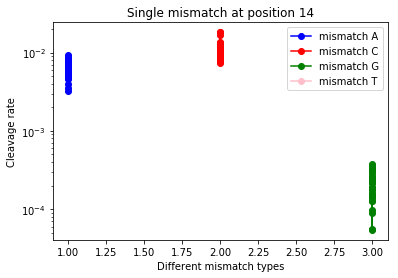

In [75]:
plt.semilogy(np.ones(len(A)),A,color='blue',marker='o')
plt.semilogy(np.ones(len(C))*2,C,color='red',marker='o')
plt.semilogy(np.ones(len(G))*3,G,color='green',marker='o')
plt.semilogy(np.ones(len(T))*4,T,color='pink',marker='o')
plt.legend(['mismatch A','mismatch C', 'mismatch G', 'mismatch T'])
plt.title('Single mismatch at position ' + position)
plt.xlabel('Different mismatch types')
plt.ylabel('Cleavage rate')